In [210]:
#importing libraries
import numpy as np
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt


In [211]:
#downloaded data of indices
index1 = yf.download('^IXIC', start="2010-01-01", end='2023-06-06')
index2 = yf.download('^NSEI', start="2010-01-01", end='2023-06-06')
nasdaq_close = index1['Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [212]:
# Reset the index to convert the date column to a regular column
index1.reset_index(inplace=True)
index2.reset_index(inplace=True)

# Merge the two datasets based on the common dates
common_dates_df = pd.merge(index1, index2, how='inner', on='Date')

# Filter the rows in index1 and index2 to include only the common dates
cindex1 = index1[index1['Date'].isin(common_dates_df['Date'])]
cindex2 = index2[index2['Date'].isin(common_dates_df['Date'])]


In [213]:
# Calculate the correlation coefficient
correlation_coefficient = cindex1['Close'].corr(cindex2['Close'])

# Print the correlation coefficient
print("Correlation Coefficient:", correlation_coefficient)


Correlation Coefficient: 0.9573235579309366


In [214]:
# Calculating the correlation between the lagged NSE index and NASDAQ index
#lagging NSE by 1 day
nse_lagged = cindex2['Close'].shift(1)

# Calculate the correlation between the lagged NSE index and NASDAQ index
lagged_correlation = nse_lagged.corr(cindex1['Close'])
print("Correlation between lagged NSE and NASDAQ: ", lagged_correlation)

# Determine the lead-lag relationship
if lagged_correlation >correlation_coefficient:
    print("The NASDAQ index leads the NSE index.")
elif lagged_correlation < correlation_coefficient:
    print("The NASDAQ index lags the NSE index.")
else:
    print("There is no consistent lead-lag relationship.")

# Choose the index for parameter optimization
if lagged_correlation > correlation_coefficient:
    index_for_optimization = 'NASDAQ'
else:
    index_for_optimization = 'NSE'

print("Index chosen for parameter optimization: ", index_for_optimization)

Correlation between lagged NSE and NASDAQ:  0.9573569232955661
The NASDAQ index leads the NSE index.
Index chosen for parameter optimization:  NASDAQ


In [215]:
#Finding the optimum number of days to lag the the NSE
best=0
for i in range(0,30,1):
    nasdaq_lagged = cindex1['Close'].shift(i)
    lagged_correlation = nasdaq_lagged.corr(cindex2['Close'])
    if lagged_correlation > best:
        best = lagged_correlation 
print("Correlation between lagged NSE and NASDAQ with optimum values is: ", best)
        
       
    

Correlation between lagged NSE and NASDAQ with optimum values is:  0.961021550820124


In [216]:
# Parameter optimization for Keltner Channel
best_kc_period = 0
best_kc_multiplier = 0
best_kc_profit = -float('inf')

for period in range(10, 31):
    for multiplier in range(1, 4):
        kc_middle = nasdaq_close.rolling(window=period).mean()
        kc_atr = nasdaq_close.rolling(window=period).std()
        kc_upper = kc_middle + multiplier * kc_atr
        kc_lower = kc_middle - multiplier * kc_atr

        kc_profit = kc_upper[-1] - kc_lower[-1]  # Calculate profit as the difference between upper and lower bands

        if kc_profit > best_kc_profit:
            best_kc_profit = kc_profit
            best_kc_period = period
            best_kc_multiplier = multiplier


In [217]:
# Calculate Keltner Channel with optimized parameters
kc_middle = nasdaq_close.rolling(window=best_kc_period).mean()
kc_atr = nasdaq_close.rolling(window=best_kc_period).std()
kc_upper = kc_middle + best_kc_multiplier * kc_atr
kc_lower = kc_middle - best_kc_multiplier * kc_atr


In [218]:
# Parameter optimization for Bollinger Bands
best_bb_period = 0
best_bb_std = 0
best_bb_profit = -float('inf')

for period in range(10, 31):
    for std in range(1, 4):
        bb_middle = nasdaq_close.rolling(window=period).mean()
        bb_std = nasdaq_close.rolling(window=period).std()
        bb_upper = bb_middle + std * bb_std
        bb_lower = bb_middle - std * bb_std

        bb_profit = bb_upper[-1] - bb_lower[-1]  # Calculate profit as the difference between upper and lower bands

        if bb_profit > best_bb_profit:
            best_bb_profit = bb_profit
            best_bb_period = period
            best_bb_std = std

In [219]:
# Calculate Bollinger Bands with optimized parameters
bb_middle = nasdaq_close.rolling(window=best_bb_period).mean()
bb_std = nasdaq_close.rolling(window=best_bb_period).std()
bb_upper = bb_middle + best_bb_std * bb_std
bb_lower = bb_middle - best_bb_std * bb_std


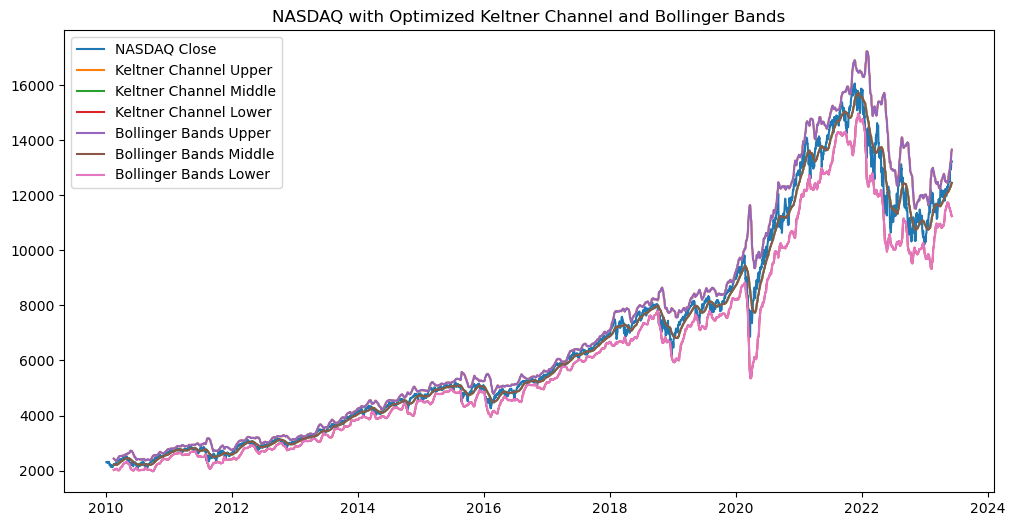

Optimized Keltner Channel parameters:
Period: 30
Multiplier: 3
Profit: 2410.241881372189
Optimized Bollinger Bands parameters:
Period: 30
Standard Deviation: 3
Profit: 2410.241881372189


In [220]:
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(nasdaq_close, label='NASDAQ Close')
plt.plot(kc_upper, label='Keltner Channel Upper')
plt.plot(kc_middle, label='Keltner Channel Middle')
plt.plot(kc_lower, label='Keltner Channel Lower')
plt.plot(bb_upper, label='Bollinger Bands Upper')
plt.plot(bb_middle, label='Bollinger Bands Middle')
plt.plot(bb_lower, label='Bollinger Bands Lower')
plt.title('NASDAQ with Optimized Keltner Channel and Bollinger Bands')
plt.legend()
plt.show()

print("Optimized Keltner Channel parameters:")
print("Period:", best_kc_period)
print("Multiplier:", best_kc_multiplier)
print("Profit:", best_kc_profit)

print("Optimized Bollinger Bands parameters:")
print("Period:", best_bb_period)
print("Standard Deviation:", best_bb_std)
print("Profit:", best_bb_profit)


In [221]:
nasdaq_ema_12 = nasdaq_close.ewm(span=12, adjust=False).mean()
nasdaq_ema_26 = nasdaq_close.ewm(span=26, adjust=False).mean()
nasdaq_macd = nasdaq_ema_12 - nasdaq_ema_26
nasdaq_macd_signal = nasdaq_macd.ewm(span=9, adjust=False).mean()
nasdaq_macd_hist = nasdaq_macd - nasdaq_macd_signal


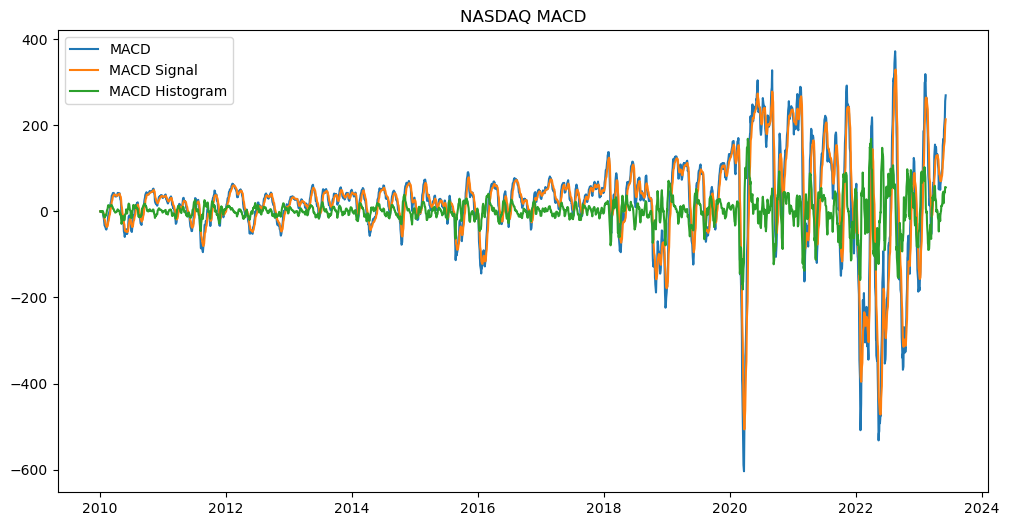

In [222]:
plt.figure(figsize=(12, 6))
plt.plot(nasdaq_macd, label='MACD')
plt.plot(nasdaq_macd_signal, label='MACD Signal')
plt.plot(nasdaq_macd_hist, label='MACD Histogram')
plt.title('NASDAQ MACD')
plt.legend()
plt.show()

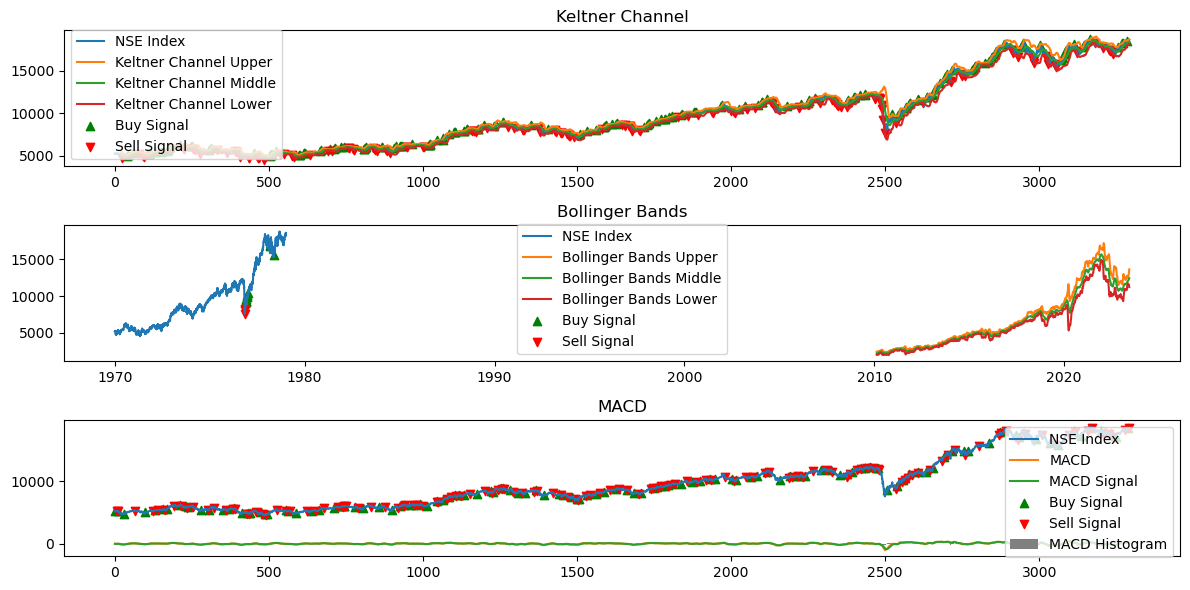

In [223]:
# Extract the 'Close' prices from the downloaded data
nse_close = index2['Close']

# Parameter optimization for Keltner Channel (based on NASDAQ)
best_kc_period = 20
best_kc_multiplier = 2

# Parameter optimization for Bollinger Bands (based on NASDAQ)
best_bb_period = 20
best_bb_std = 2

# Calculate Keltner Channel with optimized parameters
kc_middle = nse_close.rolling(window=best_kc_period).mean()
kc_atr = nse_close.rolling(window=best_kc_period).std()
kc_upper = kc_middle + best_kc_multiplier * kc_atr
kc_lower = kc_middle - best_kc_multiplier * kc_atr

# Generate buy and sell signals based on Keltner Channel
kc_buy_signals = []
kc_sell_signals = []

for i in range(1, len(nse_close)):
    if nse_close[i] > kc_upper[i - 1] and nse_close[i - 1] <= kc_upper[i - 1]:
        kc_buy_signals.append((nse_close.index[i], nse_close[i]))
    elif nse_close[i] < kc_lower[i - 1] and nse_close[i - 1] >= kc_lower[i - 1]:
        kc_sell_signals.append((nse_close.index[i], nse_close[i]))

# Generate buy and sell signals based on Bollinger Bands
bb_buy_signals = []
bb_sell_signals = []

for i in range(1, len(nse_close)):
    if nse_close[i] > bb_upper[i - 1] and nse_close[i - 1] <= bb_upper[i - 1]:
        bb_buy_signals.append((nse_close.index[i], nse_close[i]))
    elif nse_close[i] < bb_lower[i - 1] and nse_close[i - 1] >= bb_lower[i - 1]:
        bb_sell_signals.append((nse_close.index[i], nse_close[i]))

# Generate buy and sell signals based on MACD
macd_buy_signals = []
macd_sell_signals = []

for i in range(1, len(nse_close)):
    if macd[i] > macd_signal[i] and macd[i - 1] <= macd_signal[i - 1]:
        macd_buy_signals.append((nse_close.index[i], nse_close[i]))
    elif macd[i] < macd_signal[i] and macd[i - 1] >= macd_signal[i - 1]:
        macd_sell_signals.append((nse_close.index[i], nse_close[i]))
# Plotting
plt.figure(figsize=(12, 6))

# Keltner Channel
plt.subplot(3, 1, 1)
plt.plot(nse_close, label='NSE Index')
plt.plot(kc_upper, label='Keltner Channel Upper')
plt.plot(kc_middle, label='Keltner Channel Middle')
plt.plot(kc_lower, label='Keltner Channel Lower')
plt.scatter(*zip(*kc_buy_signals), marker='^', color='green', label='Buy Signal')
plt.scatter(*zip(*kc_sell_signals), marker='v', color='red', label='Sell Signal')
plt.title('Keltner Channel')
plt.legend()

# Bollinger Bands
plt.subplot(3, 1, 2)
plt.plot(nse_close, label='NSE Index')
plt.plot(bb_upper, label='Bollinger Bands Upper')
plt.plot(bb_middle, label='Bollinger Bands Middle')
plt.plot(bb_lower, label='Bollinger Bands Lower')
plt.scatter(*zip(*bb_buy_signals), marker='^', color='green', label='Buy Signal')
plt.scatter(*zip(*bb_sell_signals), marker='v', color='red', label='Sell Signal')
plt.title('Bollinger Bands')
plt.legend()

# MACD
plt.subplot(3, 1, 3)
plt.plot(nse_close, label='NSE Index')
plt.plot(macd, label='MACD')
plt.plot(macd_signal, label='MACD Signal')
plt.bar(macd.index, macd_hist, label='MACD Histogram', color='gray')
plt.scatter(*zip(*macd_buy_signals), marker='^', color='green', label='Buy Signal')
plt.scatter(*zip(*macd_sell_signals), marker='v', color='red', label='Sell Signal')
plt.title('MACD')
plt.legend()

plt.tight_layout()
plt.show()



In [241]:
# Calculate the daily returns
kc_returns = nse_close.pct_change()

# Calculate the cumulative returns
kc_cumulative_returns = (1 + kc_returns).cumprod() - 1

print(kc_cumulative_returns)


0            NaN
1       0.008734
2       0.009480
3       0.005906
4       0.002399
          ...   
3288    2.561379
3289    2.542372
3290    2.533456
3291    2.542315
3292    2.553734
Name: Close, Length: 3293, dtype: float64
